In [2]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
%matplotlib inline

In [3]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the Alpaca api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [4]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# api = tradeapi.REST()
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [5]:
# Test if API keys are properly loaded in by using 'type'-function and see if it returns string

type(os.getenv("ALPACA_API_KEY"))
type(os.getenv("ALPACA_SECRET_KEY"))

str

# Data Collection

In this step, you will need to use the Alpaca api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [6]:
# YOUR CODE HERE

# Set the list of tickers
list_of_tickers = ["SPY", "AGG"]

# Set timeframe to '1D'
timeframe = '1D'

# Set start and end datetimes of 1 year, between now and 365 days ago.
end_date = pd.Timestamp('2019-12-31', tz='America/New_York').isoformat()
start_date = pd.Timestamp('2019-01-01', tz='America/New_York').isoformat()

# Get 1 year's worth of historical data for SPY and AGG
alpaca_df = api.get_barset(
    list_of_tickers,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

alpaca_df.head()

AGG                                          \
                             open     high       low    close      volume   
time                                                                        
2019-01-02 00:00:00-05:00  106.55  106.610  106.4701  106.585  10164756.0   
2019-01-03 00:00:00-05:00  106.57  107.075  106.5700  107.020   6260265.0   
2019-01-04 00:00:00-05:00  106.66  106.720  106.5500  106.695   7755476.0   
2019-01-07 00:00:00-05:00  106.72  106.790  106.4600  106.470   6545877.0   
2019-01-08 00:00:00-05:00  106.40  106.530  105.5300  106.420   3818241.0   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2019-01-02 00:00:00-05:00  245.98  251.21  245.95  249.89  107236613  
2019-01-03 00:00:00-05:00  248.23  248.57  244.03  244.46  113782919  
2019-01-04 00:00:00-05:00  247.59  253.11  247.17  252.41  122528832  
2019-01-07 00:00:00-05:00  252.69  255.95  251.69  254.40   88317608  
2019-01-08 00:00:00-05:00  256.82  257.31  254.00  256.65   88864452

In [7]:
# Use the `drop` function with the `level` parameter to drop extra columns in the multi-index DataFrame
alpaca_df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
alpaca_df.head()

,AGG,SPY
,close,close
time,,
2019-01-02 00:00:00-05:00,106.585,249.89
2019-01-03 00:00:00-05:00,107.020,244.46
2019-01-04 00:00:00-05:00,106.695,252.41
2019-01-07 00:00:00-05:00,106.470,254.40
2019-01-08 00:00:00-05:00,106.420,256.65


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 30 years

In [8]:
# Calculate the daily roi for the stocks
# YOUR CODE HERE

# Use the `pct_change` function to calculate daily returns of `AGG` and `SPY`.
daily_returns = alpaca_df.pct_change()
daily_returns.head()

# Use the `mean` function to calculate the mean of daily returns for `TLSA` and `SPHD`, respectively
avg_daily_return_agg = daily_returns.mean()['AGG']['close']
avg_daily_return_spy = daily_returns.mean()['SPY']['close']

In [9]:
# Calculate volatility
# YOUR CODE HERE

# Use the `std` function to calculate the standard deviation of daily returns for `AGG` and `SPY`
std_dev_daily_return_agg = daily_returns.std()['AGG']['close']
std_dev_daily_return_spy = daily_returns.std()['SPY']['close']

print(f"The standard deviation of daily returns for AGG is {std_dev_daily_return_agg}")
print(f"The standard deviation of daily returns for SPY is {std_dev_daily_return_spy}")

The standard deviation of daily returns for AGG is 0.0020886019741764646
The standard deviation of daily returns for SPY is 0.007820053413439366


In [10]:
# Save the last day's closing price
# YOUR CODE HERE

agg_last_price = alpaca_df['AGG']['close'][-1]
spy_last_price = alpaca_df['SPY']['close'][-1]

In [11]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252 * 30
# monte_carlo = pd.DataFrame()
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [12]:
# Run the Monte Carlo Simulation
for x in range(number_simulations):
    
    # YOUR CODE HERE
    
    # Initialize the simulated prices list with the last closing price of `AGG` and `SPY`
    simulated_agg_prices = [agg_last_price]
    simulated_spy_prices = [spy_last_price]
    
    # Simulate the returns for 252 * 30 days
    for i in range(number_records):
        
        # Calculate the simulated price using the last price within the list
        simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_return_agg, std_dev_daily_return_agg))
        simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_return_spy, std_dev_daily_return_spy))
        
        # Append the simulated price to the list
        simulated_agg_prices.append(simulated_agg_price)
        simulated_spy_prices.append(simulated_spy_price)
        
    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df["AGG prices"] = pd.Series(simulated_agg_prices)
    simulated_price_df["SPY prices"] = pd.Series(simulated_spy_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (60% SPY; 40% AGG)
    weights = [0.4, 0.6]
    
    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[x] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

In [13]:
# Visualize the Simulation
# YOUR CODE HERE
portfolio_cumulative_returns

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000475,1.000537,0.998808,1.005395,1.011797,0.994452,0.997250,1.013277,1.000868,0.995376,...,1.002066,0.992709,1.001800,1.002671,0.996472,1.003160,1.001638,1.006801,0.998172,0.994766
2,1.008876,1.004700,1.003591,0.996711,1.009570,0.994247,0.994213,1.007201,1.000225,0.993035,...,1.005758,0.994517,1.003317,1.006181,0.997472,0.991774,1.002764,1.005409,0.996137,0.998871
3,1.008286,1.004228,1.003771,0.998233,1.007751,0.987669,0.998228,1.001363,1.000230,1.001277,...,1.006771,0.988443,1.004117,1.010565,0.993294,0.994454,1.008272,0.999144,0.998655,1.003329
4,1.013962,1.006575,1.008494,1.002636,1.013663,0.990972,1.003241,0.995493,1.002048,1.006035,...,1.004196,0.992122,1.004723,1.004422,0.994844,0.993782,1.005723,1.002248,0.996963,1.004095
5,1.016864,0.999694,1.001494,1.016174,1.011404,0.989530,1.007597,0.997139,1.010585,1.001111,...,1.001935,0.994918,0.996560,1.003818,0.995533,0.989140,0.987618,1.005462,0.995583,1.002235
6,1.014970,0.994635,1.002979,1.016080,1.008688,0.994839,1.002579,0.999370,1.010472,0.998743,...,1.009678,0.998872,0.995571,1.007188,0.989045,0.987966,0.995397,1.000199,0.996102,1.007647
7,1.006783,0.994941,1.011372,1.024488,1.010475,0.997588,1.002657,0.995783,1.006781,1.002243,...,1.007757,1.003213,1.002978,1.009481,0.991149,0.989243,0.996224,1.006242,0.990780,1.014263
8,1.003390,1.004256,1.011296,1.030079,1.007390,1.000019,0.998645,0.998112,1.004554,1.005716,...,1.010607,1.005153,1.003615,1.010353,0.992840,0.991361,1.002770,1.009448,0.992657,1.012774
9,1.004732,1.008168,1.008687,1.026804,1.000158,0.993490,1.003563,0.999381,1.007445,1.005680,...,1.000479,1.009969,1.012136,1.010408,0.997699,0.994003,1.013190,1.011006,0.987582,1.013327


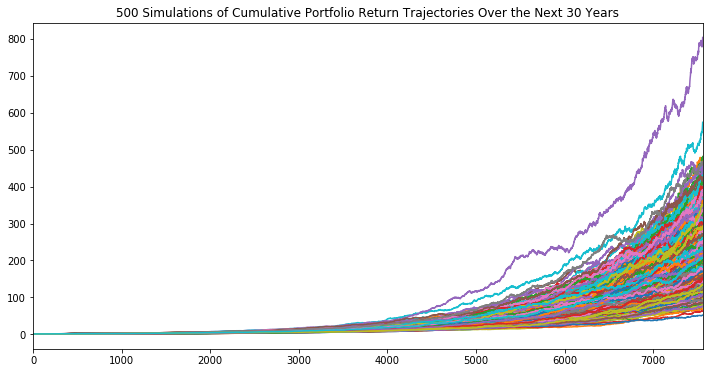

In [14]:
plot_title = f"{x+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 30 Years"
monte_carlo_plot = portfolio_cumulative_returns.plot(legend=False, title=plot_title, figsize=(12, 6))
monte_carlo_plot

In [15]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
# YOUR CODE HERE

ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns

0      192.769939
1      171.963857
2      177.992293
3      138.460439
4      175.622694
5      406.595515
6      102.234885
7      209.318807
8      178.367586
9      153.115371
10     219.828360
11     238.702013
12      94.962986
13     125.807079
14     392.194544
15     220.314350
16     142.695364
17     131.589251
18     257.459697
19     102.827072
20      94.083128
21     405.630045
22      96.894687
23     387.660305
24     364.365820
25     269.635786
26     113.947745
27     226.309336
28     170.521336
29     142.506761
          ...    
470    110.421177
471    217.792254
472    200.398061
473    199.290507
474    107.801090
475    118.362122
476    141.870339
477    174.370868
478    115.615700
479    180.796258
480    174.300294
481    285.445128
482    230.550932
483    300.615055
484    215.472164
485    270.108095
486    252.327310
487    126.409246
488    292.876901
489    235.366495
490    206.850892
491    209.781981
492    200.644529
493    149.216748
494    214

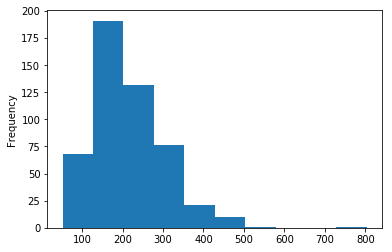

In [16]:
# plo frequency distribution of ending cumulative returns

ending_cumulative_returns.plot(kind='hist', bins=10)

In [17]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
# YOUR CODE HERE

# simulation is for 30 years, so cumulative returns at 20 years needs to iloc for 5041 

ending_cumulative_returns20yr = portfolio_cumulative_returns.iloc[5041, :]
ending_cumulative_returns20yr

0      33.444689
1      30.894574
2      27.873291
3      25.001603
4      47.062184
5      69.770592
6      22.732214
7      32.031602
8      29.444014
9      25.014797
10     46.241164
11     38.443609
12     16.402505
13     23.240484
14     41.651285
15     63.469662
16     27.225828
17     23.632422
18     43.391874
19     23.605168
20     25.526274
21     72.469534
22     18.933692
23     49.729023
24     41.010374
25     39.853275
26     19.756492
27     30.719943
28     37.056515
29     28.487213
         ...    
470    25.581604
471    43.695953
472    41.065541
473    30.408953
474    19.661652
475    20.607697
476    25.962141
477    31.794190
478    20.651233
479    32.893440
480    35.717055
481    39.739935
482    50.108699
483    40.885547
484    44.993487
485    42.087354
486    40.061481
487    38.845612
488    41.527950
489    50.704088
490    34.605947
491    27.836133
492    33.339705
493    24.624510
494    31.460310
495    64.595648
496    39.659986
497    73.2453

In [18]:
# Display the 90% confidence interval for the ending returns
# YOUR CODE HERE

# Use the `quantile` function to calculate the 90% confidence interval for simulated ending prices
confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval

0.05    102.825245
0.95    379.342101
Name: 7560, dtype: float64

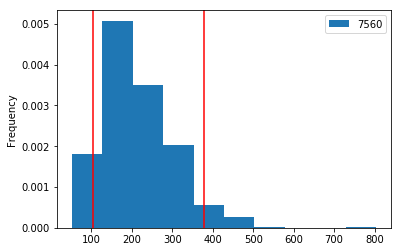

In [19]:
# Visualize the distribution of the ending returns
# YOUR CODE HERE
plt.figure();
ending_cumulative_returns.plot(kind='hist',legend=True, density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [29]:
# YOUR CODE HERE

# ! Please not these numbers are highly unusual/unrealistic because undelrying data Monte Carlo only covers 2019 which was an exceptionally good year at the stock markets

percentile_10 = np.percentile(ending_cumulative_returns, 10)
percentile_50 = np.percentile(ending_cumulative_returns, 50)
percentile_90 = np.percentile(ending_cumulative_returns, 90)
print(f"The expected cumulative return at 30 years for 10th percentile is {percentile_10}")
print(f"The expected cumulative return at 30 years for 50th percentile is {percentile_50}")
print(f"The expected cumulative return at 30 years for 90th percentile is {percentile_90}")

The expected cumulative return at 30 years for 10th percentile is 119.02985783731046
The expected cumulative return at 30 years for 50th percentile is 199.0899699441323
The expected cumulative return at 30 years for 90th percentile is 321.3717215869276


### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [32]:
# YOUR CODE HERE

# ! Please not these numbers are highly unusual/unrealistic because undelrying data Monte Carlo only covers 2019 which was an exceptionally good year at the stock markets

expected_portfolio_return10 = 20000 + (20000 * percentile_10)
expected_portfolio_return50 = 20000 + (20000 * percentile_50)
expected_portfolio_return90 = 20000 + (20000 * percentile_90)

print(f"The expected portfolio return after 30 yrs with initial investment of 20k in 10th percentile is ${expected_portfolio_return10}")
print(f"The expected portfolio return after 30 yrs with initial investment of 20k in 50th percentile is ${expected_portfolio_return50}")
print(f"The expected portfolio return after 30 yrs with initial investment of 20k in 90th percentile is ${expected_portfolio_return90}")

The expected portfolio return after 30 yrs with initial investment of 20k in 10th percentile is $2400597.156746209
The expected portfolio return after 30 yrs with initial investment of 20k in 50th percentile is $4001799.3988826456
The expected portfolio return after 30 yrs with initial investment of 20k in 90th percentile is $6447434.431738552


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [33]:
# YOUR CODE HERE

# ! Please not these numbers are highly unusual/unrealistic because undelrying data Monte Carlo only covers 2019 which was an exceptionally good year at the stock markets 

projected_yearly_income = 6085  #(see account summary exercise)
retirement_withdraw_10 = expected_portfolio_return10 * 0.04
print(f"The 4% withdraw rate would equal ${retirement_withdraw_10} and the current projected annual income is {projected_yearly_income}. This means Harold will have a balance of ${retirement_withdraw_10-projected_yearly_income}")


The 4% withdraw rate would equal $96023.88626984837 and the current projected annual income is 6085. This means Harold will have a balance of $89938.88626984837


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [37]:
# YOUR CODE HERE

expected_portfolio_return10_30k = 30000 + (30000 * percentile_10)
expected_portfolio_return50_30k = 30000 + (30000 * percentile_50)
expected_portfolio_return90_30k = 30000 + (30000 * percentile_90)

print(expected_portfolio_return10_30k)
print(expected_portfolio_return50_30k)
print(expected_portfolio_return90_30k)

print(f" The difference between an inititial investment of 30k and 20k in the 10th percentile would be ${expected_portfolio_return10_30k-expected_portfolio_return10}")
print(f" The difference between an inititial investment of 30k and 20k in the 50th percentile would be ${expected_portfolio_return50_30k-expected_portfolio_return50}")
print(f" The difference between an inititial investment of 30k and 20k in the 90th percentile would be ${expected_portfolio_return90_30k-expected_portfolio_return90}")

3600895.735119314
6002699.098323969
9671151.647607828
 The difference between an inititial investment of 30k and 20k in the 10th percentile would be $1200298.5783731048
 The difference between an inititial investment of 30k and 20k in the 50th percentile would be $2000899.6994413235
 The difference between an inititial investment of 30k and 20k in the 90th percentile would be $3223717.215869276


### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [24]:
# YOUR CODE HERE

# first day/last day
# expected cumulative returns 

# Use the Monte Carlo data and calculate the cumulative returns at the 5%, 50%, and 95% quartiles

projected_returns = portfolio_cumulative_returns.quantile(q=[0.05, 0.5, 0.95], axis=1).transpose()
projected_returns.head()


,0.05,0.5,0.95
0,1.000000,1.000000,1.000000
1,0.992690,1.000784,1.008572
2,0.990438,1.001288,1.013288
3,0.989383,1.002329,1.015727
4,0.988242,1.002971,1.018309


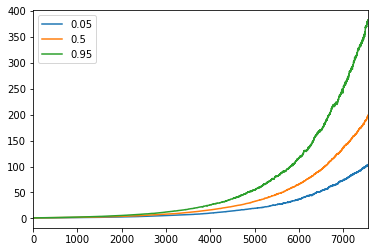

In [25]:
projected_returns.plot()


## Optional Challenge - Early Retirment (change initial investment or weights) ##

In [26]:
# different risk portfolios

# Set the portfolio weights (80% SPY; 20% AGG) - which means a more aggresive portfolio 80 percent in ETF right now and only 20% in bonds. In a high market this higer risk would increase our gains. 
new_weights = [0.2, 0.8]
    
    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
portfolio_daily_returns = simulated_daily_returns.dot(new_weights)
    
    # Calculate the normalized, cumulative return series
portfolio_cumulative_returns[x] = (1 + portfolio_daily_returns.fillna(0)).cumprod()
    
    # 
portfolio_cumulative_returns.head(11)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000475,1.000537,0.998808,1.005395,1.011797,0.994452,0.997250,1.013277,1.000868,0.995376,...,1.002066,0.992709,1.001800,1.002671,0.996472,1.003160,1.001638,1.006801,0.998172,0.993271
2,1.008876,1.004700,1.003591,0.996711,1.009570,0.994247,0.994213,1.007201,1.000225,0.993035,...,1.005758,0.994517,1.003317,1.006181,0.997472,0.991774,1.002764,1.005409,0.996137,0.998273
3,1.008286,1.004228,1.003771,0.998233,1.007751,0.987669,0.998228,1.001363,1.000230,1.001277,...,1.006771,0.988443,1.004117,1.010565,0.993294,0.994454,1.008272,0.999144,0.998655,1.004500
4,1.013962,1.006575,1.008494,1.002636,1.013663,0.990972,1.003241,0.995493,1.002048,1.006035,...,1.004196,0.992122,1.004723,1.004422,0.994844,0.993782,1.005723,1.002248,0.996963,1.005001
5,1.016864,0.999694,1.001494,1.016174,1.011404,0.989530,1.007597,0.997139,1.010585,1.001111,...,1.001935,0.994918,0.996560,1.003818,0.995533,0.989140,0.987618,1.005462,0.995583,1.002421
6,1.014970,0.994635,1.002979,1.016080,1.008688,0.994839,1.002579,0.999370,1.010472,0.998743,...,1.009678,0.998872,0.995571,1.007188,0.989045,0.987966,0.995397,1.000199,0.996102,1.010348
7,1.006783,0.994941,1.011372,1.024488,1.010475,0.997588,1.002657,0.995783,1.006781,1.002243,...,1.007757,1.003213,1.002978,1.009481,0.991149,0.989243,0.996224,1.006242,0.990780,1.019888
8,1.003390,1.004256,1.011296,1.030079,1.007390,1.000019,0.998645,0.998112,1.004554,1.005716,...,1.010607,1.005153,1.003615,1.010353,0.992840,0.991361,1.002770,1.009448,0.992657,1.016299
9,1.004732,1.008168,1.008687,1.026804,1.000158,0.993490,1.003563,0.999381,1.007445,1.005680,...,1.000479,1.009969,1.012136,1.010408,0.997699,0.994003,1.013190,1.011006,0.987582,1.015570


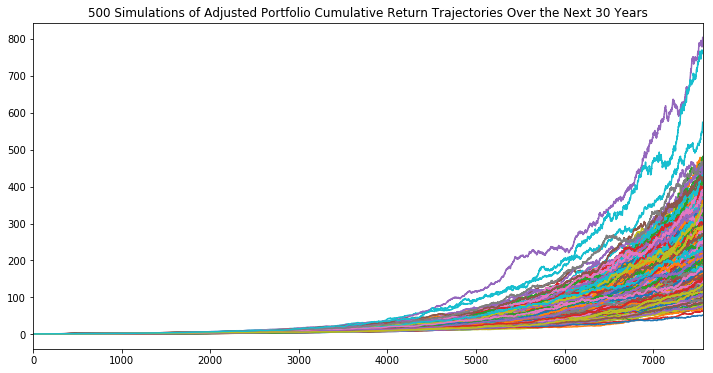

In [46]:
plot_title= f"{x+1} Simulations of Adjusted Portfolio Cumulative Return Trajectories Over the Next 30 Years"
portfolio_cumulative_returns.plot(legend=False, title=plot_title, figsize=(12, 6))
